<a href="https://colab.research.google.com/github/matkeii/THC/blob/main/APLICACI%C3%93N_DE_DIJKSTRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmo de Dijkstra

El algoritmo de Dijkstra nos sirve para determinar el camino más corto, dado un vértice inicial, hacia el resto de los vértices en una gráfica con pesos en las aristas. Así, para nuestro nodo inicial $A$, tendremos un vector $D$ que guardará al final del algoritmo las distancias desde $A$ hasta el resto de los nodos.
1. **Inicializar.** Inicializamos todas las distancias en $D$ con un valor infinito menos la de $A$, que se debe colocar en $0$.
2. **Marcar el nodo permanente.** Se toma $A$ como nodo permanente o definitivo.
3. **Idetificar los nodos vecinos disponibles.** Se recorren todos los nodos adyacentes de $A$, excepto los nodos marcados como permanentes y llamamos a los nodos no marcados $v_i$.
4. **Retiquetado.** Para el nodo actual, se calcula la distancia temporal desde ese nodo a sus vecinos. La distancia temporal del vecino $v_i$ es la distancia que actualmente tiene el nodo en el vector $D$ más la distancia desde dicho nodo $A$ (el nodo permanente) hasta el nodo $v_i$. Si la distancia tentativa es menor que la distancia almacenada en el vector, entonces se actualiza el vector con esta distancia tentativa.
5. **Actualizar nodo permanente.** Se toma como próximo nodo permanente el de menor valor en $D$ y se regresa al paso 3, mientras existan nodos no marcados.

**Observaciones.**
- **$MD.$** Una matriz de costos de las aristas del grafo, donde en $MD[u,v]$ se almacena el costo de la arista entre $u$ y $v$.
- **$ED.$** Conjunto que contendrá los vértices para los cuales ya se tiene determinado el camino mínimo.
- $D.$ Un arreglo unidimensional tal que $D[v]$ es el costo del camino mínimo del vértice origen al vértice $v$.
- $O.$ Un arreglo unidimensional tal que $P[v]$ es el vértice predecesor de $v$ en el camino mínimo que se tiene construido.

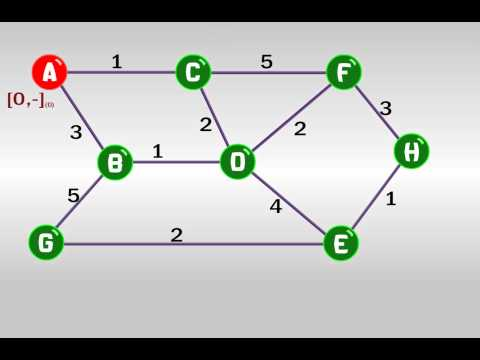

In [ ]:
from IPython.display import YouTubeVideo
video = YouTubeVideo("LLx0QVMZVkk",height = 400,width = 550)
display(video)

### Ejercicio 1
Programa una función que reciba la matriz de pesos de una gráfica y el nodo inicial y que aplique el algoritmo de Dijkstra. Tu función debe regresar una lista con las distancias de las rutas y el origen de la arista con la que terminó la ruta.

Comandos útiles de numpy:
- ```np.shape(Matriz)```
- ```np.inf```
- ```np.zeros(n)```
- ```np.ones(n)```
- ```np.where(condicion)```
- ```np.min(lista)```

Comandos útiles de python:
- ```dict.fromkeys(lista)```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Dijkstra(MD,e):
    n,n = MD.shape

    # Estados que estoy visitando y son modificables
    E = []

    # Estados Definitivos
    ED = []

    # Origen de la arista
    O = np.inf*np.ones(n)
    #[inf inf inf inf inf inf inf inf]
    #En un principio es como decir, no vengo de ningún nodo

    # Distancia de la ruta
    D = np.inf*np.ones(n)
    #[inf inf inf inf inf inf inf inf]
    #Poner la distacia a cualquier nodo es infinito

    #PASO 1
    # Inicialización
    O[e] = e
    D[e] = 0
    E.append(e)

    # Mientras que aún no tengas la ruta mas corta a todos los puntos
    while len(ED) < n:

        #PASO 2
        # Agregar e como definitivo
        ED.append(e)

        #PASO 3
        # Busca a los vecinos de tu nodo e
        uindex = np.where(MD[e,]!=0)[0]

        #PASO 4
        # Si no esta en tus nodos definitivos y es vecino ent
        # checa si su distancia puede ser mejorada.
        for i in uindex:
            if i not in ED:
                E.append(i)
                if D[e] + MD[e,i] < D[i]:
                    D[i] = D[e] + MD[e,i]
                    O[i] = e

        # Quitarlo de la otra lista
        E.remove(e)

        # Quitar repetidos
        E = list(dict.fromkeys(E))
        #ED = list(dict.fromkeys(ED))

        #Pasa 5
        # Ya tenemos todos?
        if len(ED) == n:
            break

        # Buscamos al siguiente nodo e con la mínima distancia hasta ahora.
        m = np.min(D[E])
        index = np.where(D==m)[0]
        for i in index:
            if i in E:
                e = i
    return D,O

In [ ]:
import numpy as np

def Dijkstra(MD, e):
    n, n = MD.shape
    E = [] #ESTADOS QUE PUEDEN CAMBIAR
    ED = [] #ESTADOS FIJOS
    O = np.inf * np.ones(n) #ORIGEN
    D = np.inf * np.ones(n) #LONGITUD DE ARISTAS
    ruta_terminada = []

    O[e] = e
    D[e] = 0
    E.append(e) #AÑADIMOS E

    while len(ED) < n: #HASTA QUE NO TENGAMOS LA RUTA MAS CORTA
        ED.append(e) #FIJAMOS
        uindex = np.where(MD[e,] != 0)[0]
        for i in uindex: #SI NO ESTÁ EN NODOS FIJOS Y SI ESTÁ PRESENTE, VERIFICAMOS QUE PUEDE SER MAS CORTO
            if i not in ED:
                E.append(i)
                if D[e] + MD[e, i] < D[i]:
                    D[i] = D[e] + MD[e, i]
                    O[i] = e
        E.remove(e) #QUITAMOS A E
        E = list(dict.fromkeys(E)) #QUITAMOS REPETIDOS
        if len(ED) == n: #VERIFICAMOS QUE SEA EL MINIMO
            break
        m = np.min(D[E]) #SEGUIMOS CON EL SIGUIENTE NODO
        index = np.where(D == m)[0]
        for i in index:
            if i in E:
                e = i
    for nodo in ED: #VEMOS LA LISTA PARA VER DONDE TERMINÓ NUESTRA SECUENCIA
        ruta_terminada.append(O[nodo])
    return D, ruta_terminada

#EJEMPLO
MD = np.array([[0, 5, 0, 7, 0],
               [5, 0, 4, 9, 0],
               [0, 4, 0, 0, 6],
               [7, 9, 0, 0, 4],
               [0, 0, 6, 4, 0]])

e = 0
distancias, origen_arista = Dijkstra(MD, e)
print("Distancias:", distancias)
print("Origen de la arista que terminó la ruta:", origen_arista)

Distancias: [ 0.  5.  9.  7. 11.]
Origen de la arista que terminó la ruta: [0.0, 0.0, 0.0, 1.0, 3.0]


### Ejercicio 2
Ahora, usando las listas generadas por tu función del algoritmo de Dijkstra, programa una función que encuentre el camino óptimo entre dos vértices.

In [12]:
def camino_opt(origen_arista, destino, e):
    camino_optimo = [destino]

    while destino != e:
        destino = int(origen_arista[destino])
        camino_optimo.insert(0, destino)

    return camino_optimo

#EJEMPLO
MD = np.array([[0, 5, 0, 8, 0],
               [6, 0, 4, 2, 0],
               [0, 3, 0, 0, 6],
               [8, 2, 0, 0, 3],
               [0, 0, 8, 2, 0]])

e = 0
distancias, origen_arista = Dijkstra(MD, e)

#SACAR EL CAMINO OPTIMO
d = 0  #NODO INICIAL
destino = 4  #NODO AL QUE QUIERO LLEGAR
camino_optimo = camino_opt(origen_arista, destino, d)
print("Camino óptimo entre {} y {}: {}".format(d, destino, camino_optimo))

Camino óptimo entre 0 y 4: [0, 1, 3, 4]


### Ejercicio 3
Prueba tus funciones con las siguientes matrices de pesos, empezando siempre en el nodo 0.</br>
También usa la libreria ``networkx`` para crear las graficas.</br>
**Nota :** Donde encuentres un cero quiere decir que no existe una arista entre dichos vertices </br>
**Gráfica 1**</br>
La matriz de pesos está dada por:

\begin{bmatrix}
2 & 4 & 3 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 7 & 4 & 6 & 0 & 0 & 0\\
0 & 0 & 0 & 3 & 2 & 4 & 0 & 0 & 0\\
0 & 0 & 0 & 4 & 1 & 5 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 4 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 6 & 3 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 3 & 3 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 4
\end{bmatrix}

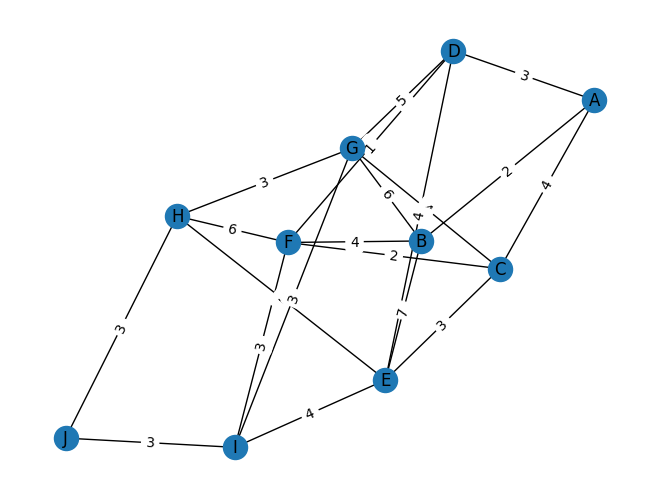

In [ ]:
import networkx as nx
aristas = {'A':[['B','C','D'],[2,4,3]],
           'B':[['E','F','G'],[7,4,6]],
           'C':[['E','F','G'],[3,2,4]],
           'D':[['E','F','G'],[4,1,5]],
           'E':[['H','I'],[1,4]],
           'F':[['H','I'],[6,3]],
           'G':[['H','I'],[3,3]],
           'H':[['J'],[3]],
           'I':[['J'],[3]]}
G = nx.Graph()
V = list(aristas.keys())
for i in range(len(V)):
    for j in range(len(aristas[V[i]][0])):
        G.add_edge(V[i],aristas[V[i]][0][j],weight= aristas[V[i]][1][j])
# Creamos Posiciones Para Los Nodos
pos = nx.spring_layout(G)
# Dibujamos Los Nodos De Acuerdo a La Posición
nx.draw(G, pos, with_labels=True)
# Creamos Las Etiquetas Para Las Aristas
labels = {(u,v): d['weight'] for (u,v,d) in G.edges(data=True)}
# Dibujamos Las Etiquetas de las Aristas de Acuerdo a La Posición
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
# Para Guardar la Grafica Se Usa Este Comando
#plt.savefig("Grafica1.png")
plt.show()

**Gráfica 2**</br>
La matriz de pesos está dada por:

\begin{bmatrix}
0 & 3 & 0 & 2 & 0 & 0 & 0 & 0\\
3 & 0 & 1 & 0 & 4 & 0 & 0 & 0\\
0 & 1 & 0 & 3 & 0 & 2 & 2 & 0\\
2 & 0 & 3 & 0 & 0 & 0 & 4 & 0\\
0 & 4 & 0 & 0 & 0 & 0 & 0 & 6\\
0 & 0 & 2 & 0 & 0 & 0 & 3 & 4\\
0 & 0 & 2 & 4 & 0 & 3 & 0 & 5\\
0 & 0 & 0 & 0 & 6 & 4 & 5 & 0
\end{bmatrix}

Camino óptimo entre 0 y 7: [0, 1, 2, 5, 7]


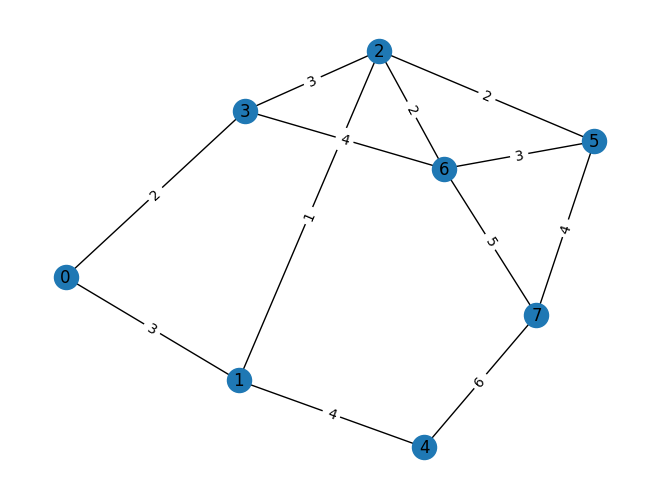

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def Dijkstra(MD, e):
    n, n = MD.shape
    E = []
    ED = []
    O = np.inf * np.ones(n)
    D = np.inf * np.ones(n)
    O[e] = e
    D[e] = 0
    E.append(e)

    while len(ED) < n:
        ED.append(e)
        uindex = np.where(MD[e,] != 0)[0]

        for i in uindex:
            if i not in ED:
                E.append(i)
                if D[e] + MD[e, i] < D[i]:
                    D[i] = D[e] + MD[e, i]
                    O[i] = e
        E.remove(e)
        E = list(dict.fromkeys(E))
        if len(ED) == n:
            break
        m = np.min(D[E])
        index = np.where(D == m)[0]
        for i in index:
            if i in E:
                e = i
    return D, O

def encontrar_camino_optimo(origen_arista, destino, e):
    camino_optimo = [destino]
    while destino != e:
        destino = int(origen_arista[destino])
        camino_optimo.insert(0, destino)

    return camino_optimo

#MATRIZ NUEVA
MD_nueva = np.array([[0, 3, 0, 2, 0, 0, 0, 0],
                     [3, 0, 1, 0, 4, 0, 0, 0],
                     [0, 1, 0, 3, 0, 2, 2, 0],
                     [2, 0, 3, 0, 0, 0, 4, 0],
                     [0, 4, 0, 0, 0, 0, 0, 6],
                     [0, 0, 2, 0, 0, 0, 3, 4],
                     [0, 0, 2, 4, 0, 3, 0, 5],
                     [0, 0, 0, 0, 6, 4, 5, 0]])

#HACER GRAFO
G_nueva = nx.Graph()
V_nueva = list(range(len(MD_nueva)))
for i in range(len(V_nueva)):
    for j in range(len(V_nueva)):
        if MD_nueva[i, j] != 0:
            G_nueva.add_edge(V_nueva[i], V_nueva[j], weight=MD_nueva[i, j])

pos_nueva = nx.spring_layout(G_nueva) #PARA NODOS
nx.draw(G_nueva, pos_nueva, with_labels=True)
labels_nueva = {(u, v): d['weight'] for (u, v, d) in G_nueva.edges(data=True)} #PARA ARISTAS
nx.draw_networkx_edge_labels(G_nueva, pos_nueva, edge_labels=labels_nueva)

nodo_inicio_nueva = 0 #NODO INICIAL
nodo_destino_nueva = 7 #NODO FINAL

#DIJKSTRA
distancias_nueva, origen_arista_nueva = Dijkstra(MD_nueva, nodo_inicio_nueva)
#CAMINO OPTIMO
camino_optimo_nueva = encontrar_camino_optimo(origen_arista_nueva, nodo_destino_nueva, nodo_inicio_nueva)
print("Camino óptimo entre {} y {}: {}".format(nodo_inicio_nueva, nodo_destino_nueva, camino_optimo_nueva))
plt.show()

**Gráfica 3**</br>
Ahora tenemos una gráfica dirigida.</br>
La matriz de pesos está dada por:
\begin{bmatrix}
0 & 9 & 0 & 6\\
0 & 0 & 0 & 1\\
0 & 3 & 0 & 0\\
0 & 0 & 2 & 0
\end{bmatrix}

In [ ]:
M3 = np.zeros((4,4))
M3[0,1] = 9
M3[3,2] = 2
M3[0,3] = 6
M3[1,3] = 1
M3[2,1] = 3

In [ ]:
D3,O3 = Dijkstra(M3,0)
Camino(O3,D3,0,2)

NameError: ignored

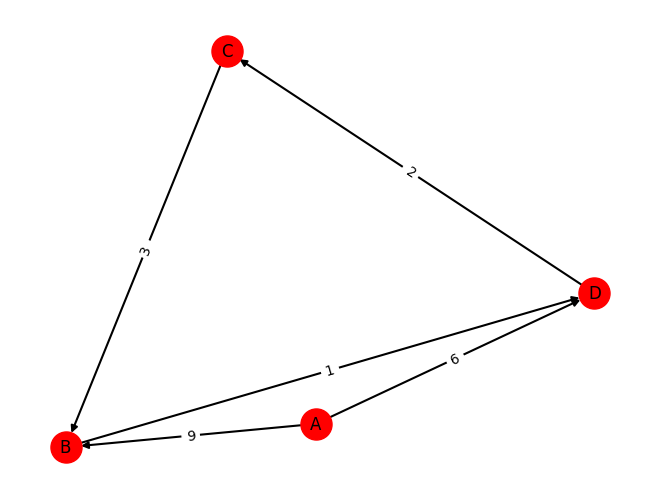

In [ ]:
G = nx.DiGraph()
G.add_edge('A','B',weight= 9)
G.add_edge('A','D',weight= 6)
G.add_edge('B','D',weight= 1)
G.add_edge('C','B',weight= 3)
G.add_edge('D','C',weight= 2)
# Creamos Posiciones Para Los Nodos
pos = nx.spring_layout(G)
# Definimos el Estilo de Nuestra Gráfica
options = {'node_color': 'red',
           'edge_color': 'black',
           'node_size': 500,
           'width': 1.5,
           'arrowstyle': '-|>',
           'arrowsize': 10,}
# Dibujamos Los Nodos De Acuerdo a La Posición
nx.draw(G, pos, with_labels=True, **options)
# Creamos Las Etiquetas Para Las Aristas
labels = {(u,v): d['weight'] for (u,v,d) in G.edges(data=True)}
# Dibujamos Las Etiquetas de las Aristas de Acuerdo a La Posición
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
# Para Guardar la Grafica Se Usa Este Comando
#plt.savefig("Grafica2.png")
plt.show()

**Gráfica 4**</br>
Otra una gráfica dirigida </br>
La matriz de pesos está dada por:
\begin{bmatrix}
0 & 4 & 8 & 16\\
0 & 0 & 5 & 11\\
0 & 0 & 0 & 6\\
0 & 0 & 0 & 0\\
\end{bmatrix}

Camino óptimo entre 0 y 3: [0, 2, 3]


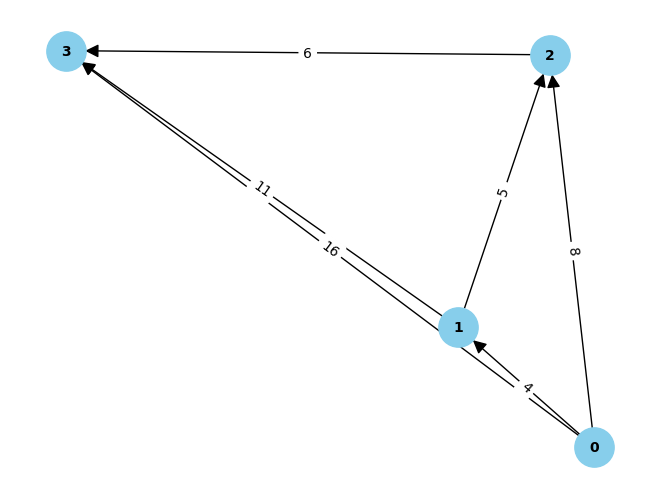

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

MD_nueva_dirigida = np.array([[0, 4, 8, 16],
                              [0, 0, 5, 11],
                              [0, 0, 0, 6],
                              [0, 0, 0, 0]])

G_nueva_dirigida = nx.DiGraph()
V_nueva_dirigida = list(range(len(MD_nueva_dirigida)))

for i in range(len(V_nueva_dirigida)):
    for j in range(len(V_nueva_dirigida)):
        if MD_nueva_dirigida[i, j] != 0:
            G_nueva_dirigida.add_edge(V_nueva_dirigida[i], V_nueva_dirigida[j], weight=MD_nueva_dirigida[i, j])

pos_nueva_dirigida = nx.spring_layout(G_nueva_dirigida) #PARA NODOS
nx.draw(G_nueva_dirigida, pos_nueva_dirigida, with_labels=True, node_size=800, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)

labels_nueva_dirigida = {(u, v): d['weight'] for (u, v, d) in G_nueva_dirigida.edges(data=True)} #PARA ARISTAS
nx.draw_networkx_edge_labels(G_nueva_dirigida, pos_nueva_dirigida, edge_labels=labels_nueva_dirigida)

nodo_inicio_nueva_dirigida = 0 #NODO INICIAL
nodo_destino_nueva_dirigida = 3 #NODO FINAL

#DIJKSTRA
distancias_nueva_dirigida, origen_arista_nueva_dirigida = Dijkstra(MD_nueva_dirigida, nodo_inicio_nueva_dirigida)
#CAMINO OPTIMO
camino_optimo_nueva_dirigida = encontrar_camino_optimo(origen_arista_nueva_dirigida, nodo_destino_nueva_dirigida, nodo_inicio_nueva_dirigida)
print("Camino óptimo entre {} y {}: {}".format(nodo_inicio_nueva_dirigida, nodo_destino_nueva_dirigida, camino_optimo_nueva_dirigida))

plt.show()